<a href="https://colab.research.google.com/github/SamdRb/Python-Projects/blob/main/HiddenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Sam Darabi

"""

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np







In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)


60000

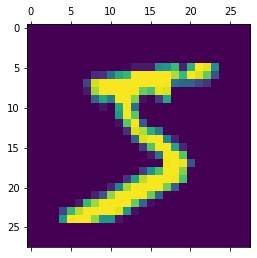

In [ ]:
plt.matshow(X_train[0])

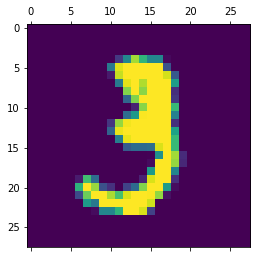

In [ ]:
plt.matshow(X_train[10])

In [ ]:
y_train[10]

3

In [ ]:
X_train [0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
model=keras.Sequential([
                        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')

])


In [ ]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5998 - accuracy: 0.8428
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1292 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6992 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4736 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4427 - accuracy: 0.8855


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.6858 - accuracy: 0.8872


[5.685819149017334, 0.8871999979019165]

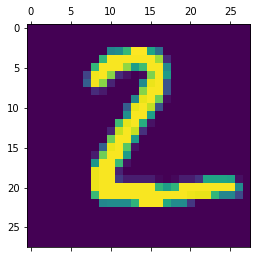

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

0

In [ ]:
y_predicted_lables= [np.argmax(i) for i in y_predicted]

y_predicted_lables[:5]

[3, 0, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_lables)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    1,    1,    0,    0,    0,    0,    0],
       [   9, 1125,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 250,  268,  502,    2,    9,    0,    1,    0,    0,    0],
       [ 166,  196,  475,  171,    0,    1,    0,    1,    0,    0],
       [  43,   42,   41,  154,  702,    0,    0,    0,    0,    0],
       [ 378,   49,  165,  225,   59,   14,    1,    0,    1,    0],
       [ 261,   54,  552,   21,   45,    5,   19,    1,    0,    0],
       [  84,   91,  221,  571,   43,   13,    0,    5,    0,    0],
       [ 104,  236,  448,  126,   46,   13,    1,    0,    0,    0],
       [  45,   37,   77,  577,  265,    1,    0,    7,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

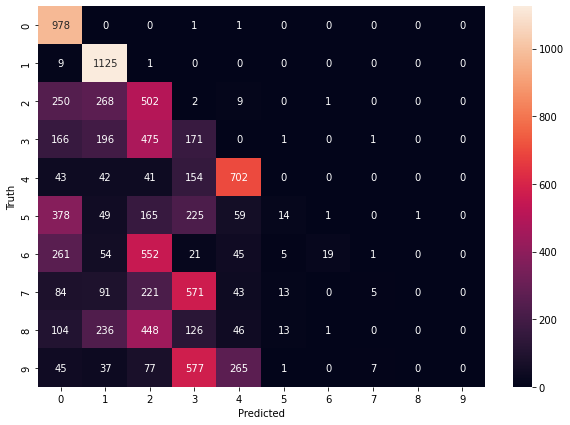

In [ ]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
                        keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')

])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3125 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.9068
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.9238
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9331
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2423 - accuracy: 0.9383


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.9336


[0.29888731241226196, 0.9336000084877014]

Text(69.0, 0.5, 'Truth')

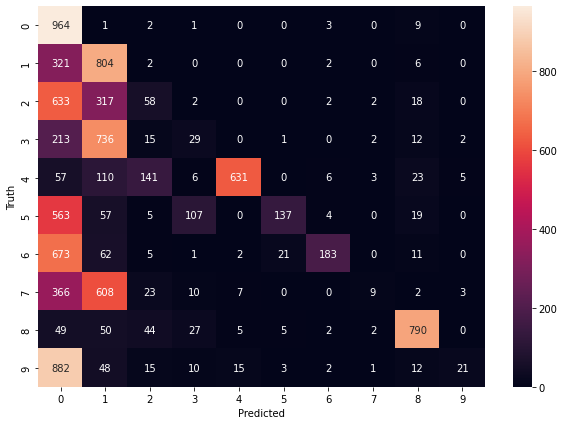

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted_lables= [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_lables)

import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')




In [ ]:
from tensorflow.python.util.nest import flatten
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')

])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3125 - accuracy: 0.8477
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3835 - accuracy: 0.9069
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2893 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9276
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9324
